# OneFormer: 一种用于通用图像分割的Transformer

## 背景介绍

OneFormer 是一种突破性的图像分割方法。图像分割是一项计算机视觉任务，涉及将图像划分为有意义的部分，传统方法通常使用不同的模型和架构来完成不同的分割任务，如识别对象（实例分割）或标记区域（语义分割）。近来的尝试着眼于通过共享架构来统一这些任务，但仍需要对每项任务进行单独训练。

<div class="wy-nav-content-img">
    <img src="assets/OneFormer_task_model_dataset.svg" width=906px alt="图像分割的几种不同的方案范式">
    <p>图1：图像分割的几种不同的方案范式</p>
</div>

OneFormer 的出现则带来了革新，它是一种通用图像分割框架，旨在解决这些问题。该方法引入了一种独特的多任务方法，使单一模型能够处理语义分割、实例分割和全景分割任务，而不需要为每个任务进行单独训练。其关键创新在于 Task-Conditioned 联合训练策略，通过任务输入引导模型，使其在训练和推理阶段都能动态适应不同的任务。

这一突破不仅简化了训练过程，而且在各种数据集上优于现有模型。OneFormer 通过使用全景注释，统一了所有任务所需的真实标签信息。此外，该框架还引入了查询-文本对比学习，以更好地区分任务并提高整体性能。

要理解 OneFormer 的意义，我们需要了解图像分割的背景。在图像处理领域，分割将图像划分为不同部分，这对识别对象和理解场景内容至关重要。传统上，主要有两种分割任务类型：语义分割，将像素标记为“道路”或“天空”等类别；实例分割，识别具有清晰边界的对象。

<div class="wy-nav-content-img">
    <img src="assets/OneFormer_segmentation_tasks.png" width=500px alt="语义分割、实例分割、全景分割的区别示意图">
    <p>图2：语义分割、实例分割、全景分割的区别示意图</p>
</div>


随着时间推移，研究人员提出了全景分割，以统一语义分割和实例分割任务。然而，即使有了这些进展，仍然存在挑战。现有的全景分割模型仍需为每个任务进行单独训练，最多只能算作半通用。

这正是 OneFormer 的革命之处。它引入了一种新颖的多任务通用架构。这种方法的核心思想是只需训练一次，通过一个通用架构、一个单一模型和一个数据集完成所有任务。令人称奇的是，OneFormer 在语义、实例和全景分割任务上均优于专用框架。这个突破不仅提升了准确率，还使图像分割更通用、高效。借助 OneFormer，不再需要为不同任务投入大量资源和进行单独训练。

## OneFormer 模型介绍

<div class="wy-nav-content-img">
    <img src="assets/OneFormer_model_arch.png" width=1000px alt="OneFormer 的模型架构图">
    <p>图3：OneFormer 的模型架构图</p>
</div>

现在，让我们解析使 OneFormer 脱颖而出的关键特性：

### 动态任务掩码
OneFormer 使用了一种称为“动态任务掩码”的巧妙策略，以更好地理解并处理不同类型的图像分割任务。当模型遇到图像时，它利用“动态任务掩码”决定是否关注整体场景、识别具有清晰边界的特定对象，或是两者的结合。

### 任务条件联合训练
OneFormer 的另一个突破性特性是其任务条件联合训练策略。与语义分割、实例分割和全景分割分别训练不同，OneFormer 在训练期间均匀地采样任务类型。此策略使模型能够同时学习并推广到不同的分割任务。通过任务标记对架构进行条件化，OneFormer 统一了训练过程，减少了对特定任务架构、模型和数据集的需求。此创新显著简化了训练流程和资源要求。

### 查询-文本对比损失
最后，我们来谈谈“查询-文本对比损失”。可以将其理解为 OneFormer 自我学习任务和类别差异的一种方式。在训练过程中，模型将从图像中提取的特征（查询）与相应的文本描述（如“一张包含汽车的照片”）进行比较。这帮助模型理解每个任务的独特特性，并减少了不同类别间的混淆。OneFormer 的“动态任务掩码”让其像一个多任务助手一样多才多艺，而“查询-文本对比损失”则通过视觉特征和文本描述的对比帮助模型学习每个任务的细节。

通过结合这些核心概念，OneFormer 成为一款智能高效的图像分割工具，使分割过程更具通用性且易于操作。

<div class="wy-nav-content-img">
    <img src="assets/OneFormer_task_conditioned_traninng.png" width=1000px alt="任务条件联合训练流程">
    <p>图3：任务条件联合训练流程</p>
</div>

## 总结

总之，OneFormer 框架代表了图像分割领域的一种突破性方法，旨在简化并统一跨领域的任务。与传统依赖于专用架构的分割方法不同，OneFormer 引入了一种新颖的多任务通用架构，仅需一个模型，基于通用数据集训练一次，即可在各种分割任务上超越现有框架。此外，训练过程中的查询-文本对比损失增强了模型对任务和类别间差异的学习能力。OneFormer 使用基于 Transformer 的架构，借鉴了计算机视觉领域的最新成功经验，并引入了任务引导查询以提高任务敏感性。结果显示，OneFormer 在 ADE20k、Cityscapes 和 COCO 等基准数据集上的语义、实例和全景分割任务中均超越了当前最先进的模型。该框架的性能在引入新型 ConvNeXt 和 DiNAT 主干网络后进一步提升。

综上所述，OneFormer 代表了向通用且易用的图像分割迈出的重要一步。通过引入一个能够处理多种分割任务的单一模型，该框架简化了分割过程并减少了资源需求。

## 在 Transformers 中使用

| 2024-11-15 10:50:56,678 | [[ natten.functional ]] [ WARNING ]: You're calling NATTEN op `natten.functional.natten2dqkrpb`, which is deprecated in favor of `natten.functional.na2d_qk`. Please consider switching, as this op will be removed soon.
| 2024-11-15 10:50:56,680 | [[ natten.functional ]] [ WARNING ]: You're calling NATTEN op `natten.functional.natten2dav`, which is deprecated in favor of `natten.functional.na2d_av`. Please consider switching, as this op will be removed soon.
| 2024-11-15 10:50:56,684 | [[ natten.functional ]] [ WARNING ]: You're calling NATTEN op `natten.functional.natten2dqkrpb`, which is deprecated in favor of `natten.functional.na2d_qk`. Please consider switching, as this op will be removed soon.
| 2024-11-15 10:50:56,686 | [[ natten.functional ]] [ WARNING ]: You're calling NATTEN op `natten.functional.natten2dav`, which is deprecated in favor of `natten.functional.na2d_av`. Please consider switching, as this op will be removed soon.
| 2024-11-15 10:50:56,

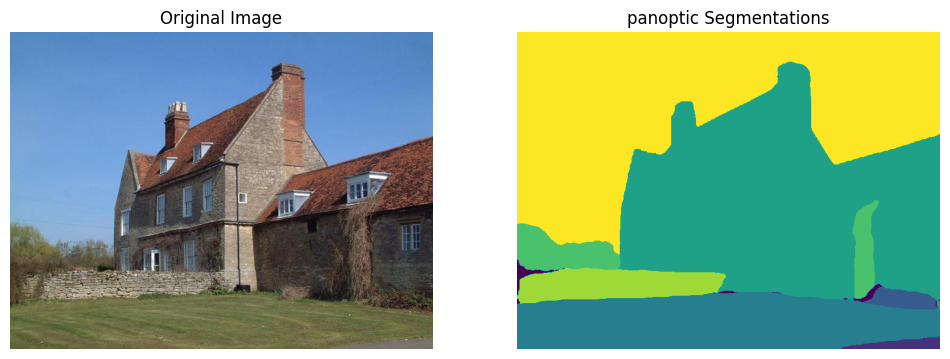

In [6]:
from transformers import OneFormerProcessor, OneFormerForUniversalSegmentation
from PIL import Image
import matplotlib.pyplot as plt
import torch

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")


def run_segmentation(image, task_type):
    """基于给定任务类型执行图像分割。

    Args:
        image (PIL.Image): 输入图像。
        task_type (str): 要执行的分割类型（'semantic'、'instance' 或 'panoptic'）。

    Returns:
        PIL.Image: 分割后的图像。

    Raises:
        ValueError: 如果任务类型无效。
    """

    processor = OneFormerProcessor.from_pretrained(
        "shi-labs/oneformer_ade20k_dinat_large"
    )  # 仅加载一次
    model = OneFormerForUniversalSegmentation.from_pretrained(
        "shi-labs/oneformer_ade20k_dinat_large", device_map=device
    )

    if task_type == "semantic":
        inputs = processor(images=image, task_inputs=["semantic"], return_tensors="pt")
        inputs = {k: v.to(device=device) for k, v in inputs.items()}
        outputs = model(**inputs)
        predicted_map = processor.post_process_semantic_segmentation(
            outputs, target_sizes=[image.size[::-1]]
        )[0]

    elif task_type == "instance":
        inputs = processor(images=image, task_inputs=["instance"], return_tensors="pt")
        inputs = {k: v.to(device=device) for k, v in inputs.items()}
        outputs = model(**inputs)
        predicted_map = processor.post_process_instance_segmentation(
            outputs, target_sizes=[image.size[::-1]]
        )[0]["segmentation"]

    elif task_type == "panoptic":
        inputs = processor(images=image, task_inputs=["panoptic"], return_tensors="pt")
        inputs = {k: v.to(device=device) for k, v in inputs.items()}
        outputs = model(**inputs)
        predicted_map = processor.post_process_panoptic_segmentation(
            outputs, target_sizes=[image.size[::-1]]
        )[0]["segmentation"]

    else:
        raise ValueError("无效的任务类型。请选择 'semantic'、'instance' 或 'panoptic'")

    return predicted_map


def show_image_comparison(image, predicted_map, segmentation_title):
    """并排显示原始图像和分割图像。

    Args:
        image (PIL.Image): 原始图像。
        predicted_map (PIL.Image): 分割图像。
        segmentation_title (str): 分割图像的标题。
    """

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(predicted_map)
    plt.title(segmentation_title + " Segmentations")
    plt.axis("off")
    plt.show()


image = Image.open("assets/OneFormer_testimg_ade20k.jpeg")

task_to_run = "panoptic"
predicted_map = run_segmentation(image, task_to_run)
show_image_comparison(image, predicted_map.cpu(), task_to_run)